## Predicting Housing Prices for regions in the USA

* The data contains the following columns:
     * 'Avg. Area Income': Avg. Income of residents of the city house is located in.
     * 'Avg. Area House Age': Avg Age of Houses in same city
     * 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
     * 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
     * 'Area Population': Population of city house is located in
     * 'Price': Price that the house sold at
     * 'Address': Address for the house


### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading USA_housing dataset

In [2]:
df=pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df = df.drop(['Address'],axis=1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
x = df.drop(['Price'],axis=1)
y = df['Price']

### Preprocessing

#### Handling outliers

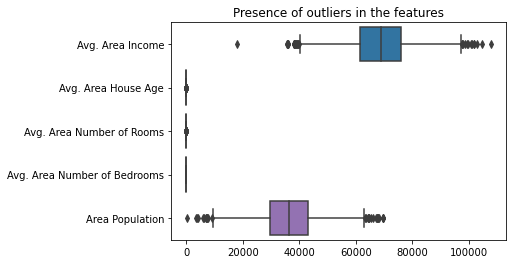

In [7]:
sns.boxplot(data=x,orient='h')
plt.title('Presence of outliers in the features')
plt.show()

In [8]:
def outlier_trt(data,col):
    X=data[col].copy()
    q3=X.quantile(0.75)
    q1=X.quantile(0.25)
    iqr=q3-q1
    for idx,entry in enumerate(data[col]):
        if (entry>q3+1.5*iqr):
            data.loc[idx,col]=q3+1.5*iqr
        elif (entry<q1-1.5*iqr):
            data.loc[idx,col]=q1-1.5*iqr
    return X[(X>q3+1.5*iqr)|(X<q1-1.5*iqr)]
    
for col in x:
    outlier_trt(x,col)

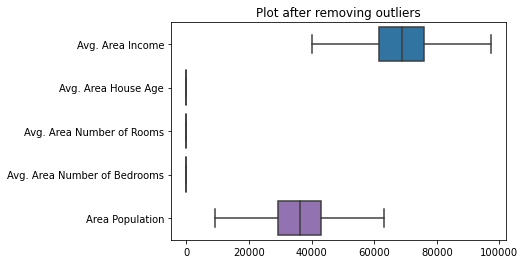

In [9]:
sns.boxplot(data=x,orient='h')
plt.title('Plot after removing outliers')
plt.show()

#### Standardising the features

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
    'Avg. Area Number of Bedrooms', 'Area Population']] = sc.fit_transform(x[['Avg. Area Income', 
                    'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']])

In [11]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0.690759,0.442853,0.504871,0.464444,0.257645
1,0.685570,0.503077,0.453949,0.242222,0.575060
2,0.371618,0.477295,0.779918,0.695556,0.513925
3,0.407593,0.726132,0.244656,0.280000,0.466146
4,0.348810,0.321985,0.656742,0.495556,0.318343


### Fitting Linear Regression model for the data

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=4,test_size=0.25)

In [13]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)

In [14]:
print('coefficients:',lr.coef_[0])
print('Intercept:',lr.intercept_)

coefficients: 1239508.8224730305
Intercept: -573629.5866633789


In [15]:
from sklearn.metrics import mean_squared_error
print('MSE is :',mean_squared_error(y_test,predictions))

MSE is : 10130956108.813992


### Predictions

In [16]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(predictions,)
table = pd.concat([y_test, y_pred], axis=1)
table = table.dropna()
table.columns = ['Actual Price','Predicted Price']
table.head()

,Actual Price,Predicted Price
2,1.058988e+06,1.186700e+06
4,6.309435e+05,1.011597e+06
8,7.988695e+05,1.712237e+06
13,1.291332e+06,7.673802e+05
15,1.306675e+06,1.981696e+06
